In [258]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

#Upload from CSVs
meat_pop_path = "New Files/meat_totals.csv"
us_temps_path = "New Files/global_temps_country.csv"
global_temps_path = "New Files/global_temps.csv"

#Read data and results
meat_pop_df = pd.read_csv(meat_pop_path)
us_temps_df = pd.read_csv(us_temps_path)
global_temps_df = pd.read_csv(global_temps_path)


us_temps_df

,month,day,year,AverageTemperature,AverageTemperatureUncertainty,Country
0,1,1,1900,-2.573,0.443,United States
1,2,1,1900,-2.912,0.533,United States
2,3,1,1900,2.636,0.358,United States
3,4,1,1900,8.091,0.263,United States
4,5,1,1900,14.317,0.239,United States
...,...,...,...,...,...,...
1360,6,1,2010,19.885,0.182,United States
1361,7,1,2010,22.078,0.229,United States
1362,8,1,2010,21.703,0.256,United States
1363,9,1,2010,17.384,0.113,United States


In [259]:
#Remove Error Message "https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy"
pd.options.mode.copy_on_write = True 

In [260]:
# Look at Data types and modify if necessary
meat_pop_df.dtypes


Month                      int64
Day                        int64
Year                       int64
beef_commercial          float64
veal_commercial          float64
pork_commercial          float64
lamb_commercial          float64
total_red_commercial     float64
beef_federal             float64
veal_federal             float64
pork_federal             float64
lamb_federal             float64
total_red_federal        float64
broilers_federal         float64
chicken_federal          float64
turkey_federal           float64
total_poultry_federal    float64
total_meat_federal       float64
dtype: object

In [261]:
#Find total red meat overall and make new column
meat_pop_df["total_red_meat"] = meat_pop_df["total_red_commercial"]+meat_pop_df["total_red_federal"]

meat_pop_df.head()

,Month,Day,Year,beef_commercial,veal_commercial,pork_commercial,lamb_commercial,total_red_commercial,beef_federal,veal_federal,pork_federal,lamb_federal,total_red_federal,broilers_federal,chicken_federal,turkey_federal,total_poultry_federal,total_meat_federal,total_red_meat
0,2,1,2024,2168.5,3.6,2371.2,10.9,4554.2,2135.0,3.4,2361.4,9.8,4509.6,3734.3,44.4,423.9,4213.3,8722.9,9063.8
1,1,1,2024,2280.8,3.9,2472.7,10.6,4768.0,2246.1,3.8,2462.4,9.6,4721.9,4051.4,47.4,435.2,4547.6,9269.5,9489.9
2,12,1,2023,2189.9,3.9,2342.0,10.7,4546.4,2159.0,3.7,2332.4,9.5,4504.7,3616.2,41.5,393.0,4063.1,8567.8,9051.1
3,11,1,2023,2280.9,4.3,2388.2,11.2,4684.5,2247.3,4.1,2377.4,10.1,4638.9,3817.3,44.5,449.2,4324.0,8962.9,9323.4
4,10,1,2023,2340.9,4.2,2418.5,11.3,4774.8,2300.8,4.0,2406.2,9.8,4720.8,4177.3,51.0,500.5,4742.1,9462.9,9495.6


In [262]:
#Look for only 1977 and after because null values before that
meat_pop_1977_df = meat_pop_df.loc[meat_pop_df["Year"]>=1977]

#Pull only columns needed
meat_pop_1977_df = meat_pop_1977_df[["Month", "Year", "total_red_commercial", "total_red_federal", "total_red_meat"]]

#Drop Null Values

meat_pop_1977_df = meat_pop_1977_df.dropna()

meat_pop_1977_df

,Month,Year,total_red_commercial,total_red_federal,total_red_meat
0,2,2024,4554.2,4509.6,9063.8
1,1,2024,4768.0,4721.9,9489.9
2,12,2023,4546.4,4504.7,9051.1
3,11,2023,4684.5,4638.9,9323.4
4,10,2023,4774.8,4720.8,9495.6
...,...,...,...,...,...
562,5,1977,3121.8,2935.0,6056.8
563,4,1977,3194.9,3007.0,6201.9
564,3,1977,3550.8,3334.0,6884.8
565,2,1977,3083.9,2888.0,5971.9


In [263]:
#Drop Null Values to convert Dtypes
us_temps_df = us_temps_df.dropna()


In [264]:
#Change Data Types
us_temps_df["month"] = us_temps_df["month"].astype("int64")
us_temps_df.dtypes

month                              int64
day                                int64
year                               int64
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [265]:
#Rename to match meat data frame
us_temps_df = us_temps_df.rename(columns={"year":"Year", "month":"Month"})

us_temps_df.dtypes
# #Filter to 1977
us_temps_1977_df = us_temps_df.loc[us_temps_df["Year"]>=1977]


#reduce
us_temps_1977_df = us_temps_1977_df[["Year", "Month", "AverageTemperature"]]
us_temps_1977_df


,Year,Month,AverageTemperature
893,1977,1,-5.601
894,1977,2,0.271
895,1977,3,2.918
896,1977,4,9.153
897,1977,5,14.556
...,...,...,...
1360,2010,6,19.885
1361,2010,7,22.078
1362,2010,8,21.703
1363,2010,9,17.384


In [266]:
#Merge!

us_temps_meat_df = pd.merge(meat_pop_1977_df, us_temps_1977_df, left_on = ["Year", "Month"], right_on = ["Year", "Month"], how = "inner")

us_temps_meat_df

,Month,Year,total_red_commercial,total_red_federal,total_red_meat,AverageTemperature
0,9,2013,3937.0,3896.4,7833.4,18.273
1,8,2013,4202.4,4161.3,8363.7,21.168
2,7,2013,4158.2,4117.8,8276.0,22.074
3,6,2013,3854.5,3817.5,7672.0,20.198
4,5,2013,4150.0,4111.6,8261.6,14.073
...,...,...,...,...,...,...
428,5,1977,3121.8,2935.0,6056.8,14.556
429,4,1977,3194.9,3007.0,6201.9,9.153
430,3,1977,3550.8,3334.0,6884.8,2.918
431,2,1977,3083.9,2888.0,5971.9,0.271


In [267]:
outliers_df = us_temps_meat_df.loc[us_temps_meat_df["total_red_meat"]>10000]

filtered_df = us_temps_meat_df[us_temps_meat_df["total_red_meat"]<=10000]

filtered_df


,Month,Year,total_red_commercial,total_red_federal,total_red_meat,AverageTemperature
0,9,2013,3937.0,3896.4,7833.4,18.273
1,8,2013,4202.4,4161.3,8363.7,21.168
2,7,2013,4158.2,4117.8,8276.0,22.074
3,6,2013,3854.5,3817.5,7672.0,20.198
4,5,2013,4150.0,4111.6,8261.6,14.073
...,...,...,...,...,...,...
428,5,1977,3121.8,2935.0,6056.8,14.556
429,4,1977,3194.9,3007.0,6201.9,9.153
430,3,1977,3550.8,3334.0,6884.8,2.918
431,2,1977,3083.9,2888.0,5971.9,0.271


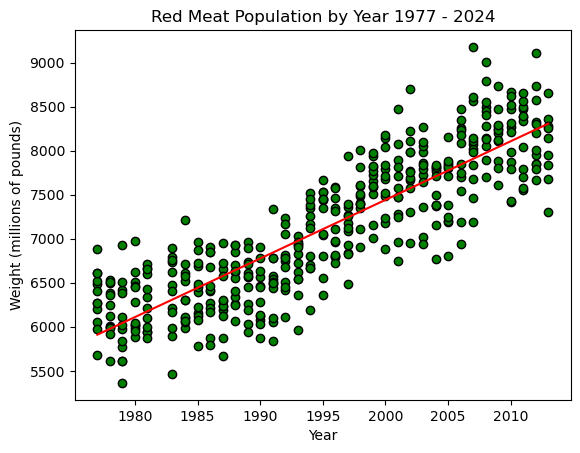

In [268]:
#Scatter plot
x = filtered_df["Year"]
y = filtered_df["total_red_meat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.title("Red Meat Population by Year 1977 - 2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(4, 5300),fontsize=15,color="red")

plt.show()


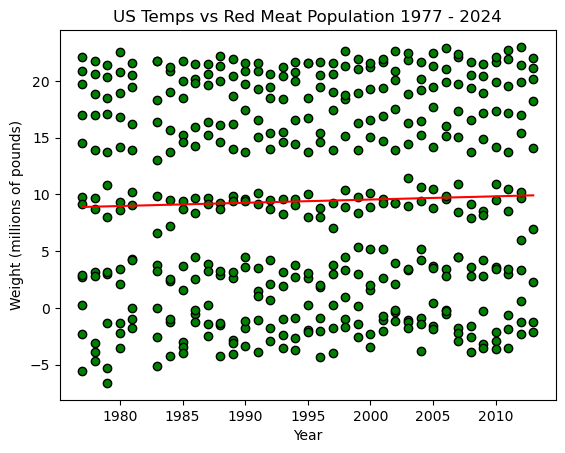

In [269]:
#Scatter plot
x = filtered_df["Year"]
y = filtered_df["AverageTemperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
plt.xlabel("Year")
plt.ylabel("Weight (millions of pounds)")
plt.title("US Temps vs Red Meat Population 1977 - 2024")
plt.scatter(x,y, marker="o", facecolors="green", edgecolors="black")
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(4, 5300),fontsize=15,color="red")

plt.show()

In [270]:
#Clean Global Temps
#Drop Null
global_temps_df = global_temps_df.dropna()

global_temps_df

,Month,Day,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1,1,2000,1.461,0.276,7.193,0.465,-4.102,0.395,13.142,0.142
1,2,1,2000,3.098,0.416,9.181,0.604,-2.814,0.626,13.777,0.173
2,3,1,2000,5.492,0.261,11.377,0.327,-0.680,0.610,14.400,0.141
3,4,1,2000,8.223,0.292,13.972,0.342,2.131,0.394,15.170,0.151
4,5,1,2000,11.385,0.357,17.415,0.329,5.179,0.379,15.955,0.159
...,...,...,...,...,...,...,...,...,...,...,...
1387,8,1,2015,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
1388,9,1,2015,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
1389,10,1,2015,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
1390,11,1,2015,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [271]:
july_df = global_temps_df.loc[global_temps_df["Month"]==7]
july_df = july_df.sort_values(by="Year")

july_df.tail(50)

,Month,Day,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1158,7,1,1996,14.827,0.097,20.650,0.087,9.123,0.129,17.220,0.061
1170,7,1,1997,14.565,0.132,20.260,0.094,8.825,0.089,17.307,0.065
1182,7,1,1998,15.340,0.074,20.972,0.062,9.715,0.170,17.609,0.062
1194,7,1,1999,14.853,0.101,20.578,0.087,9.240,0.120,17.218,0.064
1206,7,1,2000,14.848,0.120,20.665,0.107,9.098,0.098,17.242,0.066
6,7,1,2000,14.171,0.345,19.897,0.372,8.095,0.311,16.785,0.154
1218,7,1,2001,15.161,0.101,20.923,0.104,9.428,0.149,17.450,0.065
18,7,1,2001,14.339,0.350,20.340,0.430,8.161,0.374,16.718,0.158
1230,7,1,2002,15.354,0.077,21.199,0.075,9.409,0.096,17.487,0.062
30,7,1,2002,14.231,0.356,20.200,0.536,7.965,0.339,16.690,0.145


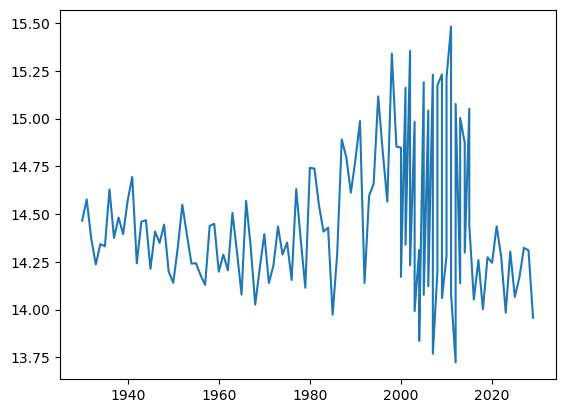

In [272]:
#Line plot
x = july_df["Year"]
y = july_df["LandAverageTemperature"]

fig, ax = plt.subplots()
ax.plot(x, y)

plt.show()


In [245]:
mean_df = global_temps_df.groupby("Year")["LandAverageTemperature"].mean()

mean_df = pd.DataFrame(mean_df)
mean_df.tail()
        

,LandAverageTemperature
Year,
2025,8.534417
2026,8.728833
2027,8.522083
2028,8.632167
2029,8.242417


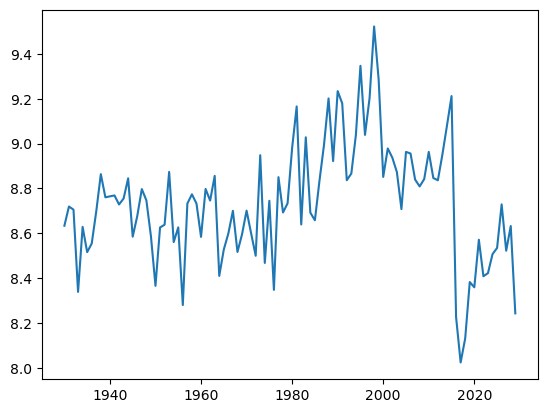

In [232]:
#Line plot
x = mean_df.index
y = mean_df["LandAverageTemperature"]

fig, ax = plt.subplots()
ax.plot(x, y)

plt.show()
